# **Metabolism Data EDA**
The motive of this EDA is to study about the data on **Metabolic syndrome**. Thsi data is derived from kaggle: https://www.kaggle.com/datasets/antimoni/metabolic-syndrome.

The information about this data on the kaggle webpage:

This dataset contains information on individuals with metabolic syndrome, a complex medical condition associated with a cluster of risk factors for cardiovascular diseases and type 2 diabetes. The data includes demographic, clinical, and laboratory measurements, as well as the presence or absence of metabolic syndrome.

1. **seqn**: Sequential identification number assigned to each individual.

2. **Age**: Age of the individual.

3. **Sex**: Gender of the individual (e.g., Male, Female).

4. **Marital**: Marital status of the individual.

5. **Income**: Income level or income-related information of the individual.

6. **Race**: Ethnic or racial background of the individual.

7. **WaistCirc**: Waist circumference measurement, typically used as an indicator of central obesity.

8. **BMI**: Body Mass Index, a measure of body composition based on height and weight.

9. **Albuminuria**: Measurement related to the presence of albumin in urine, often indicating kidney function.

10. **UrAlbCr**: Urinary albumin-to-creatinine ratio, a clinical indicator of kidney damage.

11. **UricAcid**: Uric acid levels in the blood.

12. **BloodGlucose**: Blood glucose levels, an important indicator of diabetes risk.

13. **HDL**: High-Density Lipoprotein cholesterol levels, commonly referred to as "good" cholesterol.

14. **Triglycerides**: Triglyceride levels in the blood, associated with metabolic health.

Target variable:

- **MetabolicSyndrome**: Binary variable indicating the presence (1) or absence (0) of metabolic syndrome.


----

## **The content of this EDA:**
- Exploring the overall data
    - Number of Columns
    - Null or duplicate values
    - Types of columns
        - categorical columns
        - numerical columns
        - target column

- Categorical Columns
    - segregating further
        - Binary
        - Singleton
        - multilabel (<=20 classes)
        - multilabel (>20 classes)
    - distribution of values using pie/bar chart

- Numerical columns
    - segregating further
        - continuous
        - discrete
    - looking for outliers in discrete values
    - understanding the distribution on continuous values

- understanding realtionships between columns (if any)
----

## Exploring the overall data

In [46]:
# importing the neceassary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [47]:
df = pd.read_csv("../raw_data/Metabolic Syndrome.csv")
df

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,0
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,0
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,0
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,0
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2396,71901,48,Female,Married,1000.0,Other,NaN,59.7,0,22.11,5.8,152,57,107,0
2397,71904,30,Female,Single,2000.0,Asian,NaN,18.0,0,2.90,7.9,91,90,91,0
2398,71909,28,Male,Single,800.0,MexAmerican,100.8,29.4,0,2.78,6.2,99,47,84,0
2399,71911,27,Male,Married,8200.0,MexAmerican,106.6,31.3,0,4.15,6.2,100,41,124,1


## Number of columns and their data types

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seqn               2401 non-null   int64  
 1   Age                2401 non-null   int64  
 2   Sex                2401 non-null   object 
 3   Marital            2193 non-null   object 
 4   Income             2284 non-null   float64
 5   Race               2401 non-null   object 
 6   WaistCirc          2316 non-null   float64
 7   BMI                2375 non-null   float64
 8   Albuminuria        2401 non-null   int64  
 9   UrAlbCr            2401 non-null   float64
 10  UricAcid           2401 non-null   float64
 11  BloodGlucose       2401 non-null   int64  
 12  HDL                2401 non-null   int64  
 13  Triglycerides      2401 non-null   int64  
 14  MetabolicSyndrome  2401 non-null   int64  
dtypes: float64(5), int64(7), object(3)
memory usage: 281.5+ KB


### Observation
- many features seems irrelevant also in terms of UX, like `marital` and `income`.
- features like `UricAcid`, `Triglycerides`, `HDL` are in continuous manner, but for user convinience, they sould be converted into categorical types.

In [49]:
null = 0

df_without_pk = df.drop(columns=['seqn'])
# primary key will not let us catch the duplication

for col in df.columns:
    if(df[col].isnull().sum() > 0):
        null += 1
        print(f"- \"{col}\" has {df[col].isnull().sum()} null values.")

if(null == 0):
    print("- The Data set has no null values in it.")

if(df_without_pk.duplicated().sum() > 0):
    pct = (df_without_pk.duplicated().sum()/len(df))*100.0
    print(f"- There are {df_without_pk.duplicated().sum()} duplications in this data set. With {pct:.2f}% of duplication.")
else:
    print("- No duplication found")

- "Marital" has 208 null values.
- "Income" has 117 null values.
- "WaistCirc" has 85 null values.
- "BMI" has 26 null values.
- No duplication found


### Observation
- `Marital` and `Income` feaatures has a lot of null values. They don't much relavance so they can be eliminated as a column too.
- Null values in `WaistCirc` and `BMI` needs to be handled.
- No duplication is there.

## Segragating features

In [50]:
cat_col = []
num_col = []
target = 'MetabolicSyndrome'

for col in df_without_pk.columns:
    if col == target:
        continue
    
    if df[col].dtype == 'object':
        cat_col.append(col)
    else:
        num_col.append(col)

print("Categorical columns:\n")
for col in cat_col:
    print(f"- {col}")

print("\n------------")
print("Numerical columns:\n")
for col in num_col:
    print(f"- {col}")

Categorical columns:

- Sex
- Marital
- Race

------------
Numerical columns:

- Age
- Income
- WaistCirc
- BMI
- Albuminuria
- UrAlbCr
- UricAcid
- BloodGlucose
- HDL
- Triglycerides


#### Features like `UricAcid`, `HDL`, `Triglycerides` and `Blood glucose` needs to be categorised.

In [51]:
df[num_col].describe()

,Age,Income,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides
count,2401.000000,2284.000000,2316.000000,2375.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000
mean,48.691795,4005.253940,98.307254,28.702189,0.154102,43.626131,5.489046,108.247813,53.369429,128.125364
std,17.632852,2954.032186,16.252634,6.662242,0.422780,258.272829,1.439358,34.820657,15.185537,95.322477
min,20.000000,300.000000,56.200000,13.400000,0.000000,1.400000,1.800000,39.000000,14.000000,26.000000
25%,34.000000,1600.000000,86.675000,24.000000,0.000000,4.450000,4.500000,92.000000,43.000000,75.000000
50%,48.000000,2500.000000,97.000000,27.700000,0.000000,7.070000,5.400000,99.000000,51.000000,103.000000
75%,63.000000,6200.000000,107.625000,32.100000,0.000000,13.690000,6.400000,110.000000,62.000000,150.000000
max,80.000000,9000.000000,176.000000,68.700000,2.000000,5928.000000,11.300000,382.000000,156.000000,1562.000000


In [52]:
df['UricAcidCategory'] = np.where(
    ((df['Sex'] == 'Male') & (df['UricAcid'] > 7.0)) |
    ((df['Sex'] == 'Female') & (df['UricAcid'] > 6.0)),
    'High',
    'Normal'
)
df

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome,UricAcidCategory
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,0,Normal
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,0,Normal
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,0,Normal
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,0,Normal
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2396,71901,48,Female,Married,1000.0,Other,NaN,59.7,0,22.11,5.8,152,57,107,0,Normal
2397,71904,30,Female,Single,2000.0,Asian,NaN,18.0,0,2.90,7.9,91,90,91,0,High
2398,71909,28,Male,Single,800.0,MexAmerican,100.8,29.4,0,2.78,6.2,99,47,84,0,Normal
2399,71911,27,Male,Married,8200.0,MexAmerican,106.6,31.3,0,4.15,6.2,100,41,124,1,Normal


In [53]:
df['HDLCategory'] = np.where(
    (df['HDL'] >= 60), 
    'Normal',
    'Low'
)
df

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome,UricAcidCategory,HDLCategory
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,0,Normal,Low
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,0,Normal,Low
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,0,Normal,Low
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,0,Normal,Normal
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,0,Normal,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2396,71901,48,Female,Married,1000.0,Other,NaN,59.7,0,22.11,5.8,152,57,107,0,Normal,Low
2397,71904,30,Female,Single,2000.0,Asian,NaN,18.0,0,2.90,7.9,91,90,91,0,High,Normal
2398,71909,28,Male,Single,800.0,MexAmerican,100.8,29.4,0,2.78,6.2,99,47,84,0,Normal,Low
2399,71911,27,Male,Married,8200.0,MexAmerican,106.6,31.3,0,4.15,6.2,100,41,124,1,Normal,Low


In [54]:
df['TrigCategory'] = np.where(
    (df['Triglycerides'] > 150),
    'High',
    'Normal'
)
df

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome,UricAcidCategory,HDLCategory,TrigCategory
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,0,Normal,Low,Normal
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,0,Normal,Low,Normal
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,0,Normal,Low,Normal
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,0,Normal,Normal,Normal
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,0,Normal,Low,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2396,71901,48,Female,Married,1000.0,Other,NaN,59.7,0,22.11,5.8,152,57,107,0,Normal,Low,Normal
2397,71904,30,Female,Single,2000.0,Asian,NaN,18.0,0,2.90,7.9,91,90,91,0,High,Normal,Normal
2398,71909,28,Male,Single,800.0,MexAmerican,100.8,29.4,0,2.78,6.2,99,47,84,0,Normal,Low,Normal
2399,71911,27,Male,Married,8200.0,MexAmerican,106.6,31.3,0,4.15,6.2,100,41,124,1,Normal,Low,Normal


In [55]:
conditions = [
    df['BloodGlucose'] < 140,
    (df['BloodGlucose'] >= 140) & (df['BloodGlucose'] < 200),
    df['BloodGlucose'] >= 200
]

choices = [
    'Non-Diabetic',
    'Pre-Diabetic',
    'Diabetic'
]

df['BloodSugarCategory'] = np.select(conditions, choices)
df

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome,UricAcidCategory,HDLCategory,TrigCategory,BloodSugarCategory
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,0,Normal,Low,Normal,Non-Diabetic
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,0,Normal,Low,Normal,Non-Diabetic
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,0,Normal,Low,Normal,Non-Diabetic
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,0,Normal,Normal,Normal,Non-Diabetic
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,0,Normal,Low,Normal,Non-Diabetic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2396,71901,48,Female,Married,1000.0,Other,NaN,59.7,0,22.11,5.8,152,57,107,0,Normal,Low,Normal,Pre-Diabetic
2397,71904,30,Female,Single,2000.0,Asian,NaN,18.0,0,2.90,7.9,91,90,91,0,High,Normal,Normal,Non-Diabetic
2398,71909,28,Male,Single,800.0,MexAmerican,100.8,29.4,0,2.78,6.2,99,47,84,0,Normal,Low,Normal,Non-Diabetic
2399,71911,27,Male,Married,8200.0,MexAmerican,106.6,31.3,0,4.15,6.2,100,41,124,1,Normal,Low,Normal,Non-Diabetic


### revised feature segregation

In [56]:
cat_col.clear()
num_col.clear()

for col in df.columns:
    if col == target or col == 'seqn':
        continue
    
    if df[col].dtype == 'object':
        cat_col.append(col)
    else:
        num_col.append(col)

print("Categorical columns:\n")
for col in cat_col:
    print(f"- {col}")

print("\n------------")
print("Numerical columns:\n")
for col in num_col:
    print(f"- {col}")

Categorical columns:

- Sex
- Marital
- Race
- UricAcidCategory
- HDLCategory
- TrigCategory
- BloodSugarCategory

------------
Numerical columns:

- Age
- Income
- WaistCirc
- BMI
- Albuminuria
- UrAlbCr
- UricAcid
- BloodGlucose
- HDL
- Triglycerides


## Looking into Categorical variables

In [57]:
binary = []
singleton = []
countable = []
huge = []

for col in cat_col:
    n_uniq = df[col].value_counts().count()
    print(f"- \"{col}\" has {n_uniq} unique features.")
    if(n_uniq == 1):
        singleton.append(col)
    elif(n_uniq == 2):
        binary.append(col)
    elif(n_uniq <= 20):
        countable.append(col)
    else:
        huge.append(col)

- "Sex" has 2 unique features.
- "Marital" has 5 unique features.
- "Race" has 6 unique features.
- "UricAcidCategory" has 2 unique features.
- "HDLCategory" has 2 unique features.
- "TrigCategory" has 2 unique features.
- "BloodSugarCategory" has 3 unique features.


### observation
- all the categorical features have less classes

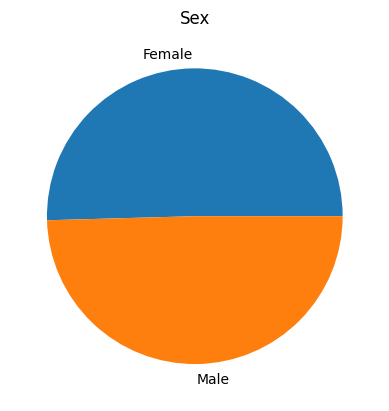

---------

Male      1190
Female    1211
Name: Sex, dtype: int64
---------



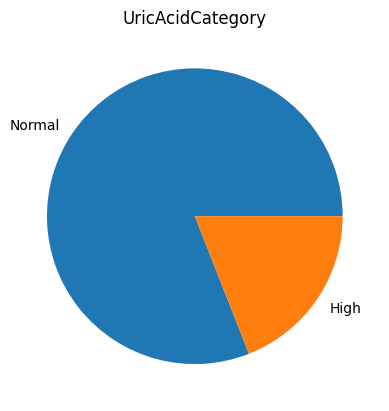

---------

Normal    1944
High       457
Name: UricAcidCategory, dtype: int64
---------



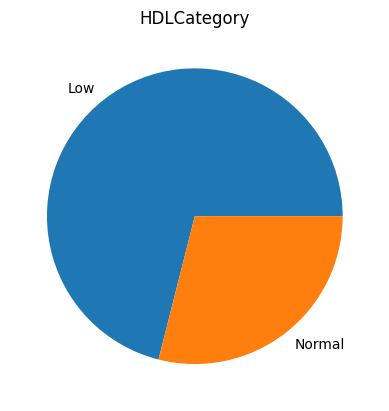

---------

Normal     695
Low       1706
Name: HDLCategory, dtype: int64
---------



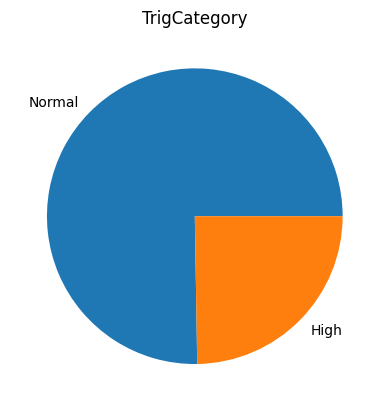

---------

Normal    1807
High       594
Name: TrigCategory, dtype: int64
---------



In [58]:
for col in binary:
    plt.pie(df[col].value_counts().values, labels=df[col].value_counts().index)
    plt.title(col)
    plt.show()
    print("---------\n")
    print(df[col].value_counts().sort_index(ascending=False))
    print("---------\n")

### Observation
- `Sex` is completely balanced
- Most people have normal `Triglycerides` and `Uric acid`
- Most people have a lower good cholestrol (`HLD`)

### Distribution of non binary/countable variables

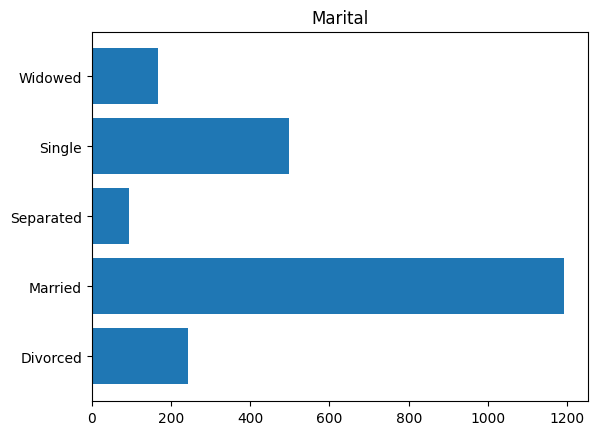

---------

Widowed       166
Single        498
Separated      95
Married      1192
Divorced      242
Name: Marital, dtype: int64
---------



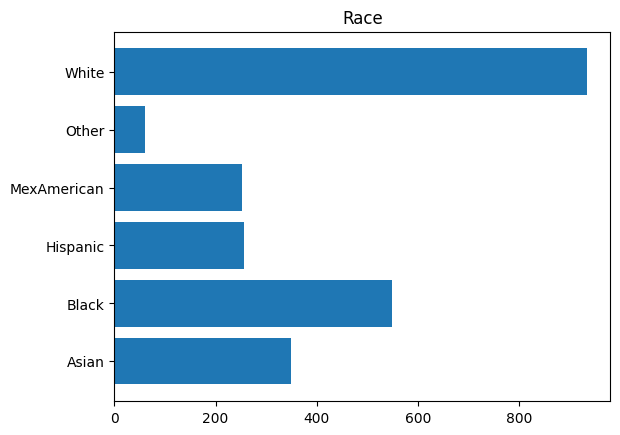

---------

White          933
Other           61
MexAmerican    253
Hispanic       257
Black          548
Asian          349
Name: Race, dtype: int64
---------



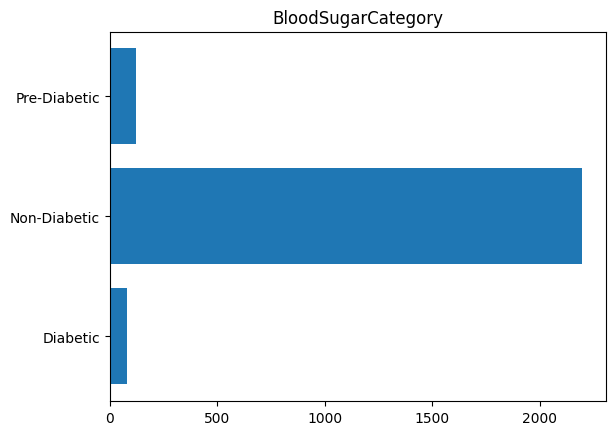

---------

Pre-Diabetic     123
Non-Diabetic    2197
Diabetic          81
Name: BloodSugarCategory, dtype: int64
---------



In [59]:
for col in countable:
    plt.barh(df[col].value_counts().sort_index().index, df[col].value_counts().sort_index().values)
    plt.title(col)
    plt.show()
    print("---------\n")
    print(df[col].value_counts().sort_index(ascending=False))
    print("---------\n")

### Observation
- a very large propertion pf people are `non diabetic`
- Most people are `married`, though that doesn't seem a useful variable/
- people with `White` race are in abundance.

   index          Age       Income    WaistCirc          BMI  Albuminuria  \
0  count  2401.000000  2284.000000  2316.000000  2375.000000  2401.000000   
1   mean    48.691795  4005.253940    98.307254    28.702189     0.154102   
2    std    17.632852  2954.032186    16.252634     6.662242     0.422780   
3    min    20.000000   300.000000    56.200000    13.400000     0.000000   
4    25%    34.000000  1600.000000    86.675000    24.000000     0.000000   
5    50%    48.000000  2500.000000    97.000000    27.700000     0.000000   
6    75%    63.000000  6200.000000   107.625000    32.100000     0.000000   
7    max    80.000000  9000.000000   176.000000    68.700000     2.000000   

       UrAlbCr     UricAcid  BloodGlucose          HDL  Triglycerides  
0  2401.000000  2401.000000   2401.000000  2401.000000    2401.000000  
1    43.626131     5.489046    108.247813    53.369429     128.125364  
2   258.272829     1.439358     34.820657    15.185537      95.322477  
3     1.400000    

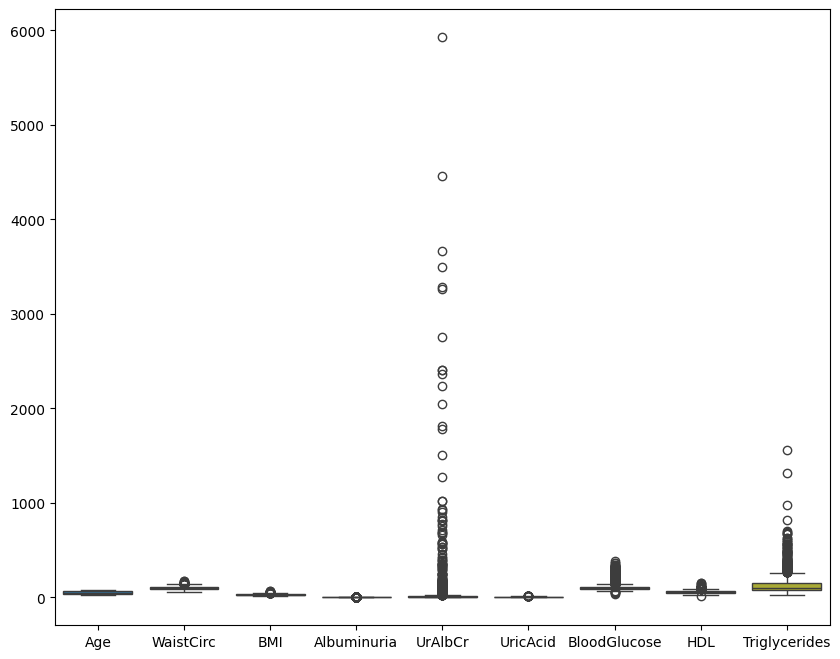

In [ ]:
print(df[num_col].describe().reset_index())

num_col.remove('Income') # unnecesarily taking space of diagram
plt.figure(figsize=(10, 8))
sns.boxplot(df[num_col])
plt.show()

num_col.append('Income')

### obseravtion
- features like `UrAlbCr` and `Triglycerides` are having high number of outliers

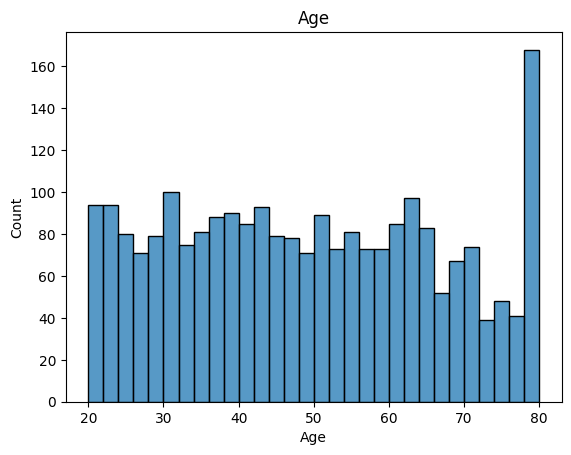

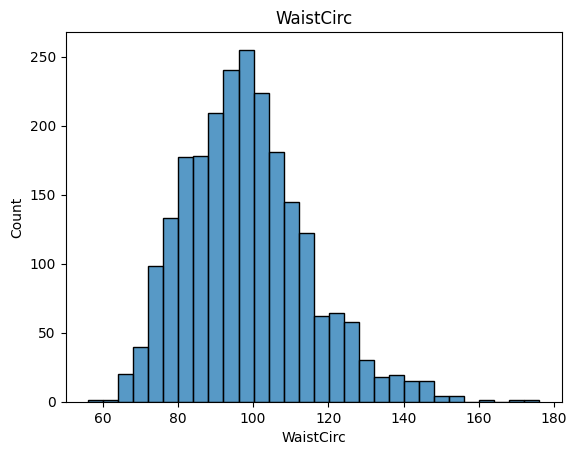

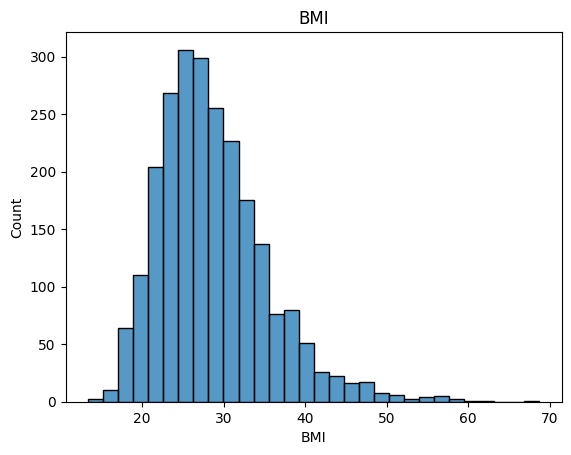

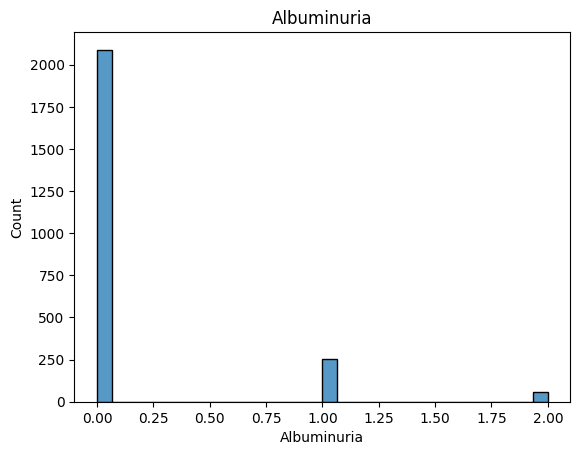

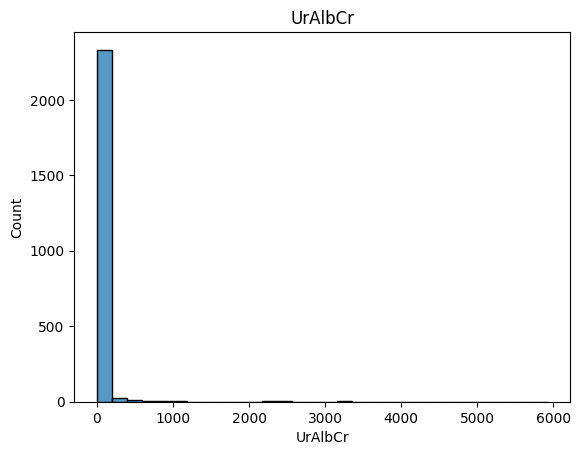

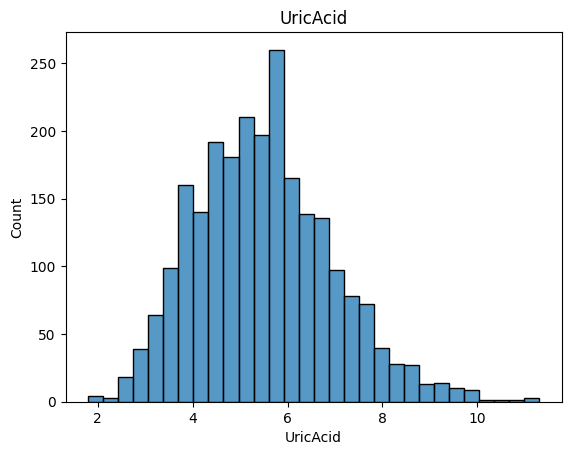

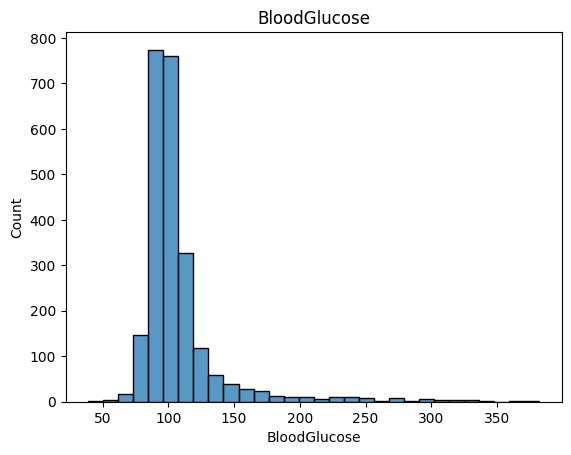

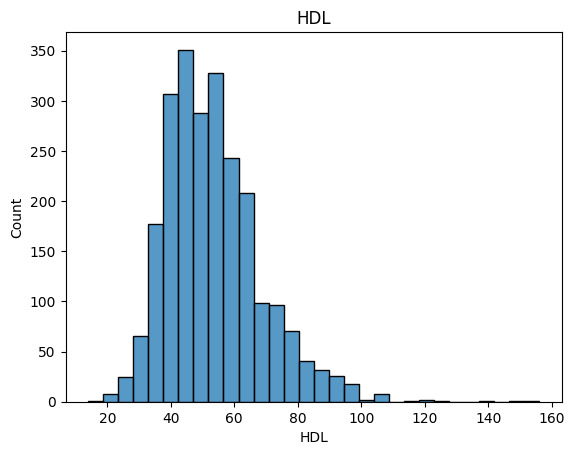

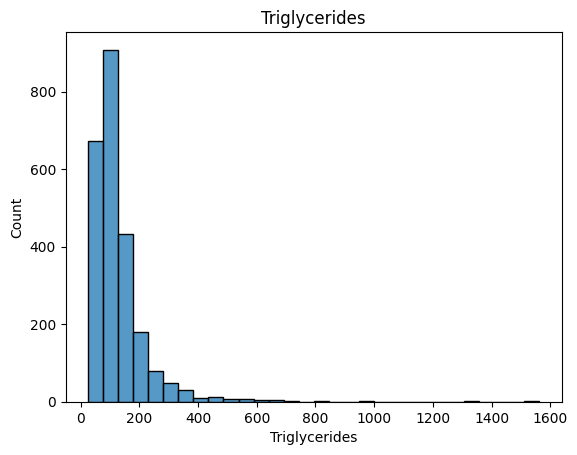

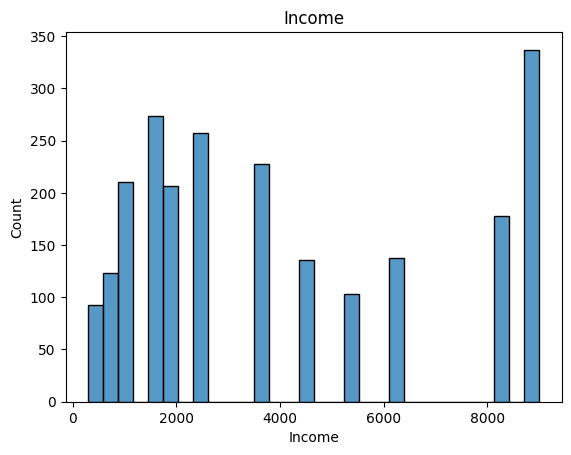

In [61]:
for col in num_col:
    sns.histplot(df[col], bins=30)
    plt.title(col)
    plt.show()

### Observation
- `Triglycerides` and `Blood glucose` are having a left skewed curve that shows most people have lower amout of them.
- `HDL` and `Uric acid` are also slightly left skewed.
- `Age` and `income` are evenly disributed but in age the older popluation is slightly higher.
- `BMI` and `waisrcirc` are showing similar trends and may have a correlation.

## Relationship for target and numerical values

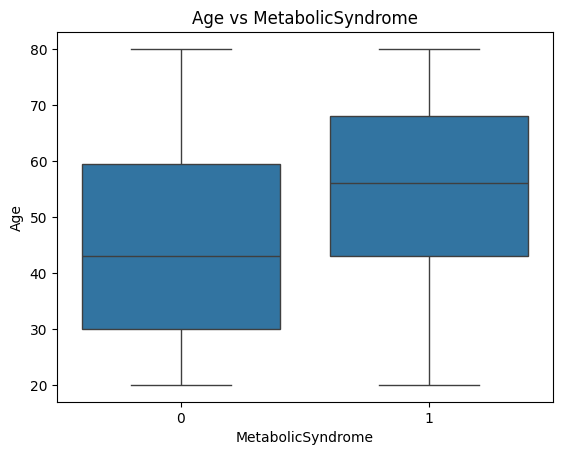

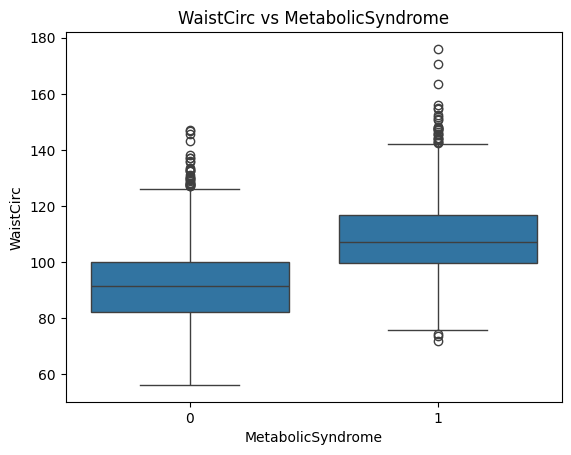

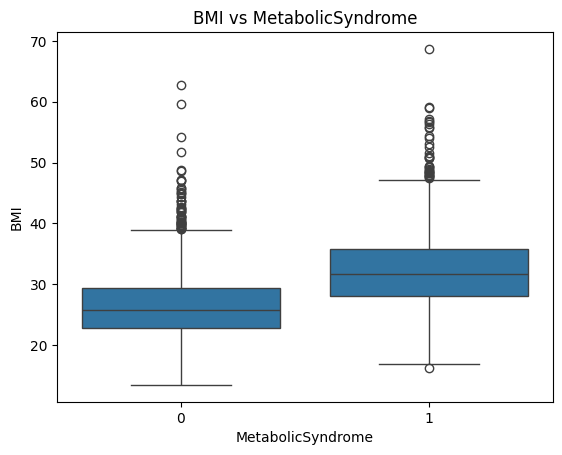

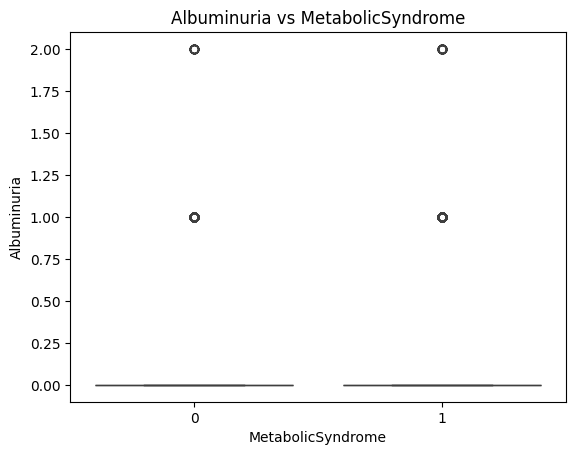

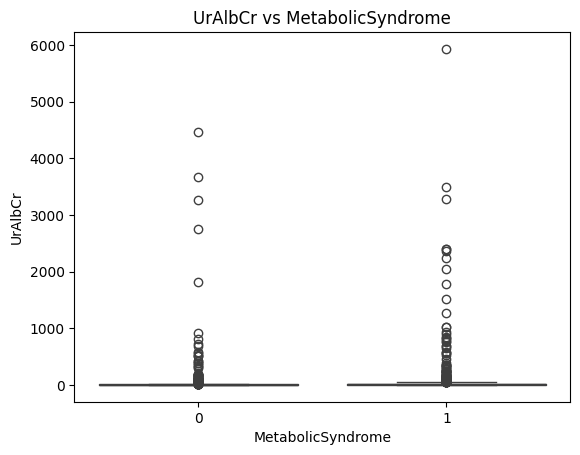

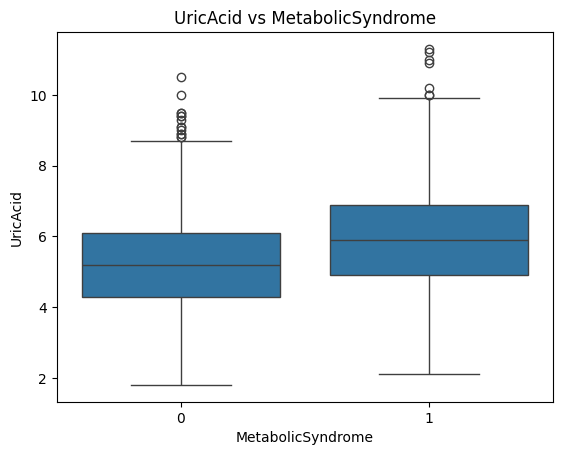

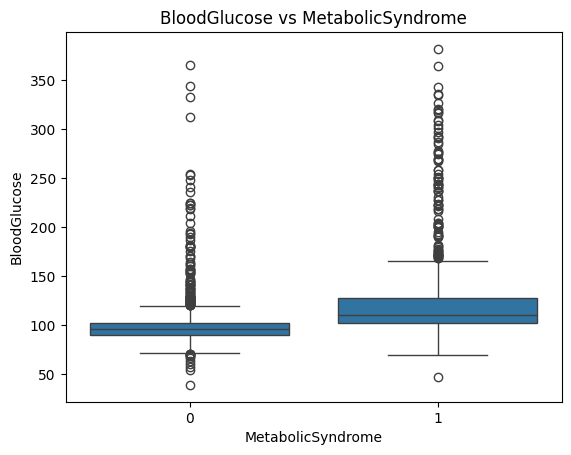

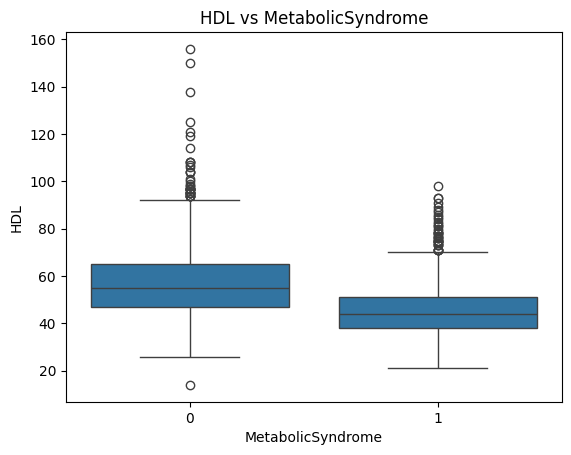

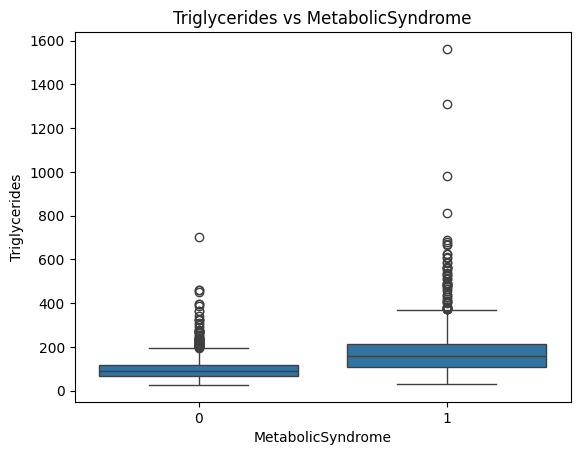

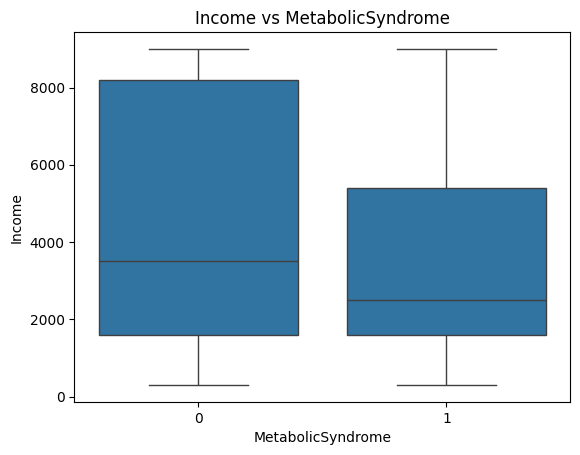

In [62]:
for col in num_col:
    sns.boxplot(
        x=target,
        y=col,
        data=df
    )
    plt.title(f"{col} vs {target}")
    plt.show()

### observation
- people with **high** `age`, `BMI`, `Triglycerides` and `uric acid` can be seen with higher chance of metabolic syndrome
- **Lower** `HDL` is also seen in people with metabolic syndrome 

In [ ]:
ct = pd.crosstab(df['BloodSugarCategory'], df[target])
print(ct)
total = ct[0]['Diabetic'] + ct[1]['Diabetic']

MetabolicSyndrome      0    1
BloodSugarCategory           
Diabetic              17   64
Non-Diabetic        1523  674
Pre-Diabetic          39   84
81 81


## Relationship for target and categorical values

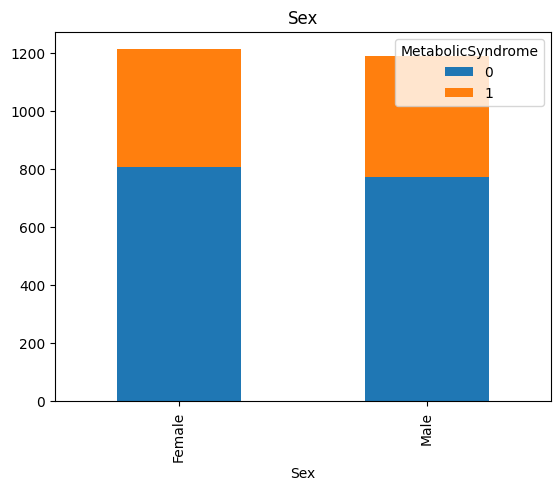

"Female" has 33.28% Metabolic syndrome cases.
"Male" has 35.21% Metabolic syndrome cases.


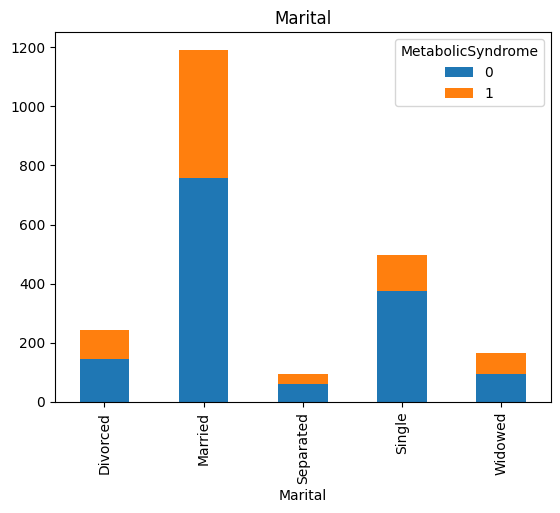

"Divorced" has 40.08% Metabolic syndrome cases.
"Married" has 36.49% Metabolic syndrome cases.
"Separated" has 35.79% Metabolic syndrome cases.
"Single" has 24.70% Metabolic syndrome cases.
"Widowed" has 42.77% Metabolic syndrome cases.


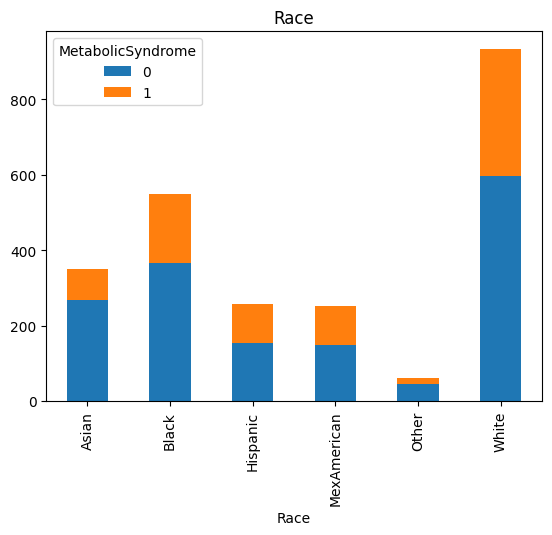

"Asian" has 23.21% Metabolic syndrome cases.
"Black" has 33.03% Metabolic syndrome cases.
"Hispanic" has 40.08% Metabolic syndrome cases.
"MexAmerican" has 40.71% Metabolic syndrome cases.
"Other" has 27.87% Metabolic syndrome cases.
"White" has 36.12% Metabolic syndrome cases.


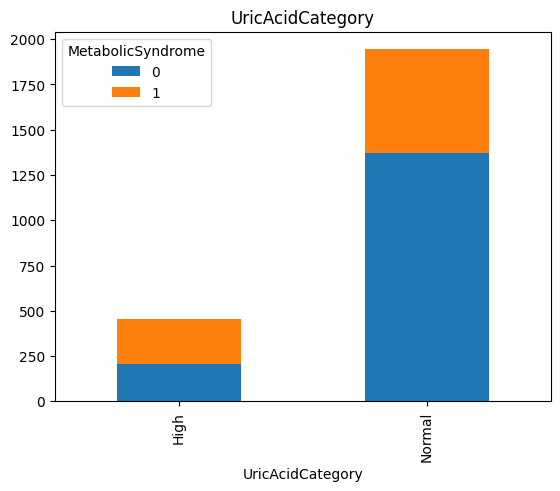

"High" has 54.92% Metabolic syndrome cases.
"Normal" has 29.37% Metabolic syndrome cases.


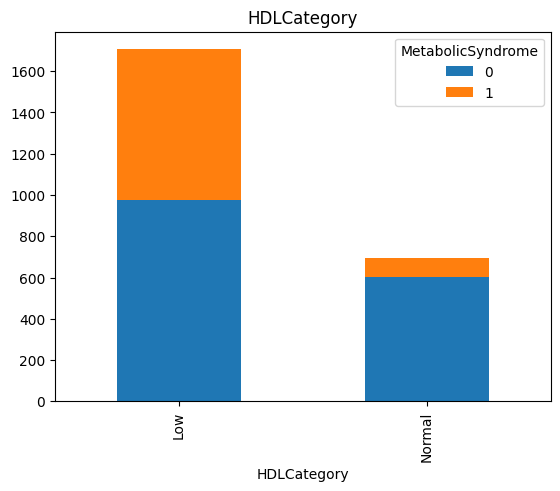

"Low" has 42.67% Metabolic syndrome cases.
"Normal" has 13.53% Metabolic syndrome cases.


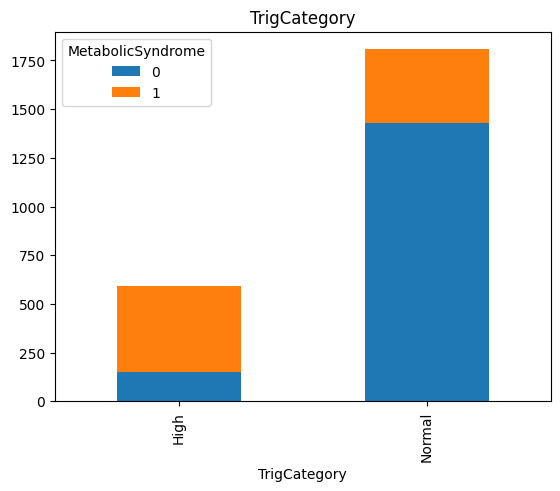

"High" has 74.92% Metabolic syndrome cases.
"Normal" has 20.86% Metabolic syndrome cases.


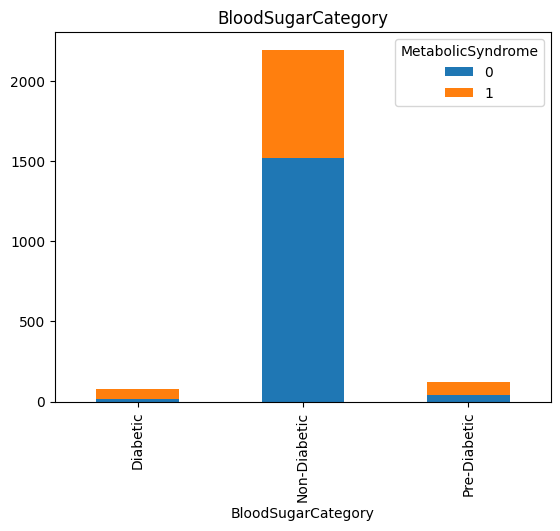

"Diabetic" has 79.01% Metabolic syndrome cases.
"Non-Diabetic" has 30.68% Metabolic syndrome cases.
"Pre-Diabetic" has 68.29% Metabolic syndrome cases.


In [72]:
for col in cat_col:
    ct = pd.crosstab(df[col], df[target])
    ct.plot(kind='bar', stacked=True)
    plt.title(col)
    plt.show()
    for i in ct.index:
        total = ct[0][i] + ct[1][i]
        print(f"\"{i}\" has {ct[1][i]/ total * 100:.2f}% Metabolic syndrome cases.")

### Observation
- people with abnormal health paramenters (high uric acid, low HDL etc) are having more cases of Metabolic syndrome.
- features like `race`, 'Marital` and `Sex` are having a kind of even disribution of cases.

## Relationship among numerical columns

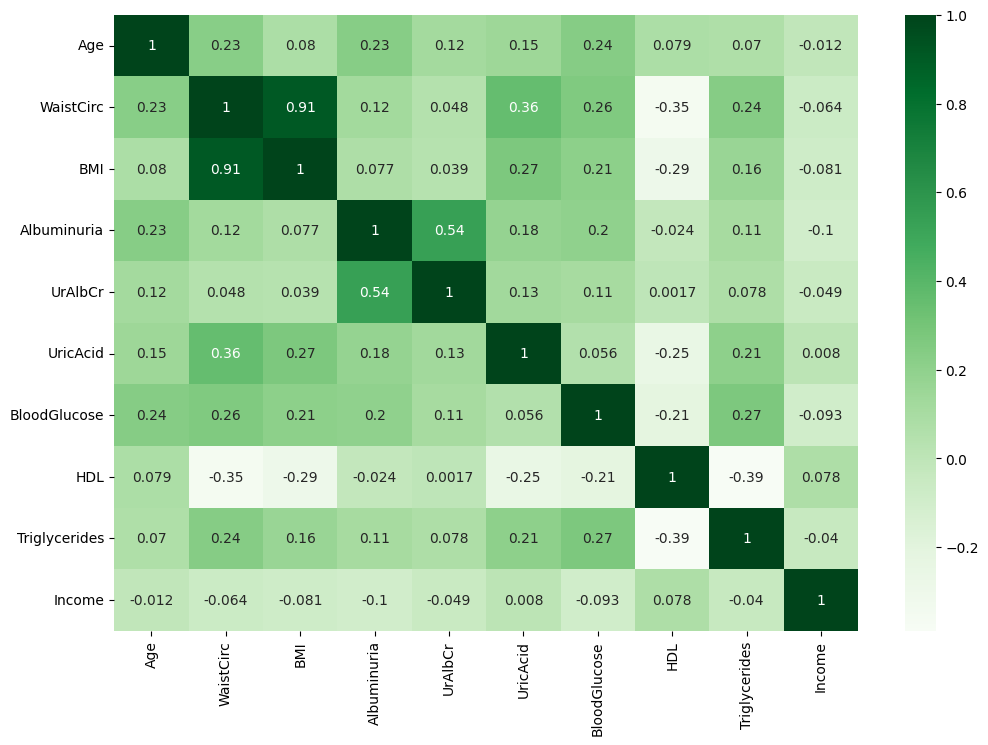

In [79]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_col].corr(), annot=True, cmap='Greens')
plt.show()

### observation
- There's a very strong positive correlation between `BMI` and `WasitCirc`.
- `Albuminuria` and `UrAlbCr` are also having a fair enough positive correlation.